# Case Study on ANOVA

### XYZ Company has offices in four different zones. The company wishes to investigate the following :
### ● The mean sales generated by each zone.
### ● Total sales generated by all the zones for each month.
### ● Check whether all the zones generate the same amount of sales. 

### Help the company to carry out their study with the help of data provided.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import stats
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv("Sales_data_zone_wise.csv")

In [3]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
df.tail()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
24,Month - 25,1256333,1622671,1521792,1695122
25,Month - 26,1422853,1715465,1853636,1520406
26,Month - 27,1384426,1983163,1611169,1289160
27,Month - 28,1616640,1547991,2128022,2178267
28,Month - 29,1310654,1660092,1947119,1854412


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [6]:
df.shape

(29, 5)

In [7]:
df.describe().round()

,Zone - A,Zone - B,Zone - C,Zone - D
count,29.0,29.0,29.0,29.0
mean,1540493.0,1755560.0,1772871.0,1842927.0
std,261940.0,168390.0,333194.0,375016.0
min,1128185.0,1527574.0,1237722.0,1234311.0
25%,1305972.0,1606010.0,1523308.0,1520406.0
50%,1534390.0,1740365.0,1767047.0,1854412.0
75%,1820196.0,1875658.0,2098463.0,2180416.0
max,2004480.0,2091194.0,2290580.0,2364132.0


In [8]:
#correlation matrix of the data
df.corr()

,Zone - A,Zone - B,Zone - C,Zone - D
Zone - A,1.000000,0.399555,-0.274219,0.114302
Zone - B,0.399555,1.000000,-0.442870,-0.452499
Zone - C,-0.274219,-0.442870,1.000000,0.390299
Zone - D,0.114302,-0.452499,0.390299,1.000000


<AxesSubplot:>

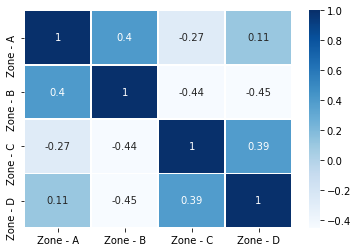

In [9]:
corr_mat = df.corr()
sns.heatmap(corr_mat,annot=True, linewidth=0.75, cmap='Blues')

<AxesSubplot:xlabel='Zone - A', ylabel='Count'>

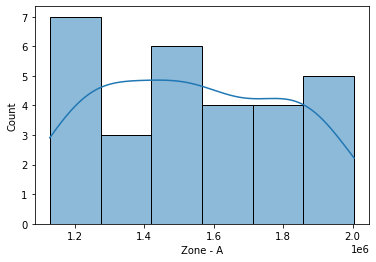

In [10]:
sns.histplot(data=df['Zone - A'],kde=True)

<AxesSubplot:xlabel='Zone - B', ylabel='Count'>

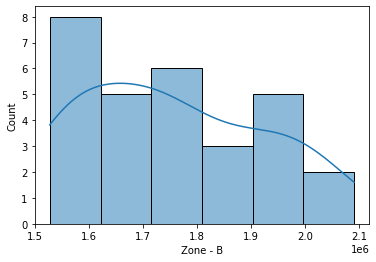

In [11]:
sns.histplot(data=df['Zone - B'],kde=True)

<AxesSubplot:xlabel='Zone - C', ylabel='Count'>

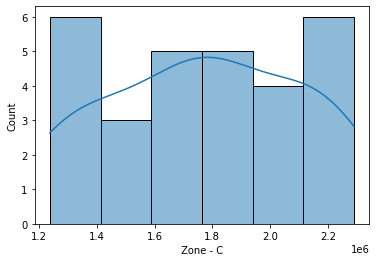

In [12]:
sns.histplot(data=df['Zone - C'],kde=True)

**Findings**

1. Data set cosists of 29 rows and 5 columns.
2. There are no null values in the data set.


# 1.The mean sales generated by each zone.

In [13]:
df.mean().round()

Zone - A    1540493.0
Zone - B    1755560.0
Zone - C    1772871.0
Zone - D    1842927.0
dtype: float64

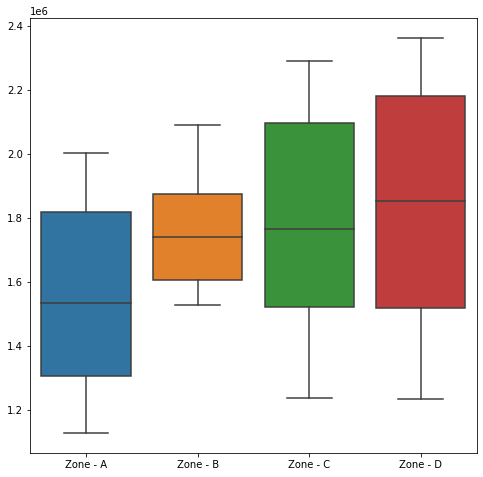

In [14]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df)
plt.show()

**Findings**

1. Zone D generate the highest mean sales then zone c.
2. The least mean sale is generated by Zone A

# 2.Total sales generated by all the zones for each month.

In [15]:
df.loc[:,'Total'] = df.sum(axis=1)

In [16]:
print(df)

         Month  Zone - A  Zone - B  Zone - C  Zone - D    Total
0    Month - 1   1483525   1748451   1523308   2267260  7022544
1    Month - 2   1238428   1707421   2212113   1994341  7152303
2    Month - 3   1860771   2091194   1282374   1241600  6475939
3    Month - 4   1871571   1759617   2290580   2252681  8174449
4    Month - 5   1244922   1606010   1818334   1326062  5995328
5    Month - 6   1534390   1573128   1751825   2292044  7151387
6    Month - 7   1820196   1992031   1786826   1688055  7287108
7    Month - 8   1625696   1665534   2161754   2363315  7816299
8    Month - 9   1652644   1873402   1755290   1422059  6703395
9   Month - 10   1852450   1913059   1754314   1608387  7128210
10  Month - 11   2004480   1740365   1317869   1970069  7032783
11  Month - 12   1537539   1875658   1237722   1460165  6111084
12  Month - 13   1254939   1588473   1348629   1733383  5925424
13  Month - 14   1821799   1844081   1617376   1872259  7155515
14  Month - 15   1128185   1804613   176

<AxesSubplot:xlabel='Total', ylabel='Count'>

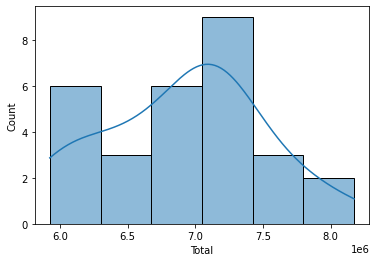

In [17]:
sns.histplot(data=df['Total'],kde=True)

In [18]:
df.groupby('Month')['Total'].mean().sort_values(ascending=False)

Month
Month - 4     8174449
Month - 8     7816299
Month - 24    7784747
Month - 22    7560001
Month - 28    7470920
Month - 21    7389597
Month - 7     7287108
Month - 14    7155515
Month - 2     7152303
Month - 6     7151387
Month - 17    7149383
Month - 10    7128210
Month - 20    7124599
Month - 18    7083490
Month - 11    7032783
Month - 1     7022544
Month - 19    6971953
Month - 29    6772277
Month - 9     6703395
Month - 23    6687919
Month - 26    6512360
Month - 16    6506659
Month - 3     6475939
Month - 27    6267918
Month - 12    6111084
Month - 25    6095918
Month - 5     5995328
Month - 15    5934156
Month - 13    5925424
Name: Total, dtype: int64

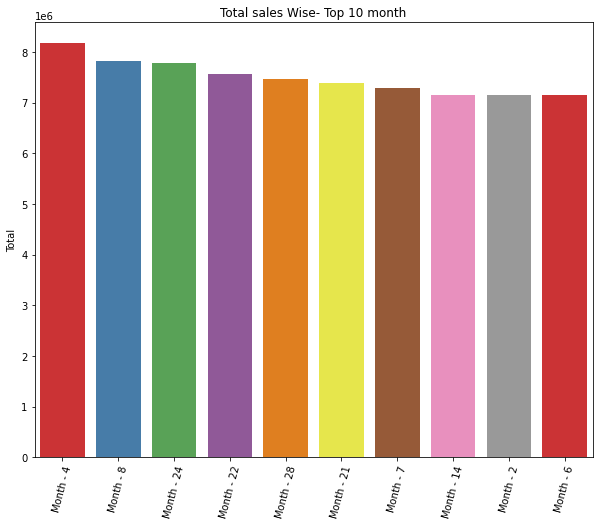

In [19]:
data = df.sort_values('Total',ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x='Month', y='Total', data=data, palette='Set1')
plt.title("Total sales Wise- Top 10 month")
plt.xticks(rotation=75)
plt.xlabel(xlabel='')
plt.show()

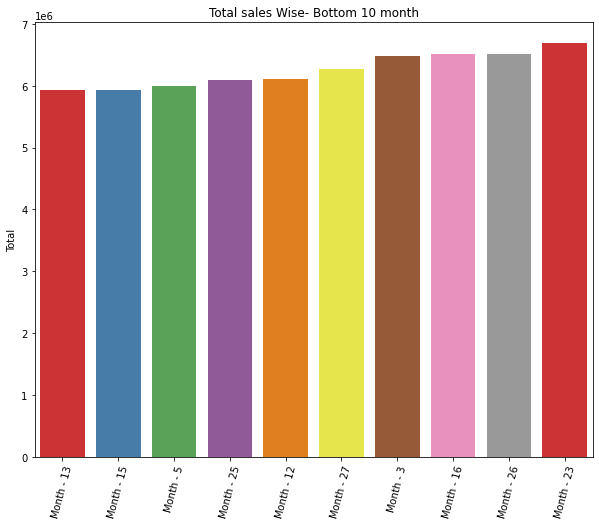

In [20]:
data = df.sort_values('Total',ascending=True).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x='Month', y='Total', data=data, palette='Set1')
plt.title("Total sales Wise- Bottom 10 month")
plt.xticks(rotation=75)
plt.xlabel(xlabel='')
plt.show()

**Findings**

1. The highest sales was happend in month 4 with total sales 81,74449.
2. Least sales was happend in month 13 with total sales 59,25424.

# 3.Check whether all the zones generate the same amount of sales.

## One way ANOVA

### H0 = Sales amount of the three zones are equal.
### H1 =  All the three zones doesn't have same mean.


In [21]:
import scipy

In [22]:
#determining f_value and p_value
from scipy.stats import f_oneway

f_val, p_val = scipy.stats.f_oneway(df['Zone - A'], df['Zone - B'], df['Zone - C'])

print('F_Statistic Value is',f_val)
print('\nP Value is',p_val)

if(p_val <= 0.05):
    print("\nThe p_value is less than significant value. Hence we reject the Null Hypothesis")
    print("All the three zones doesn't have same mean.")
    
else:
    print("\nWe accept null hypothesis")
    print(" Sales amount of the three zones are equal.")

F_Statistic Value is 7.010165231945492

P Value is 0.0015291538969922328

The p_value is less than significant value. Hence we reject the Null Hypothesis
All the three zones doesn't have same mean.


Submitted by Akshaya v